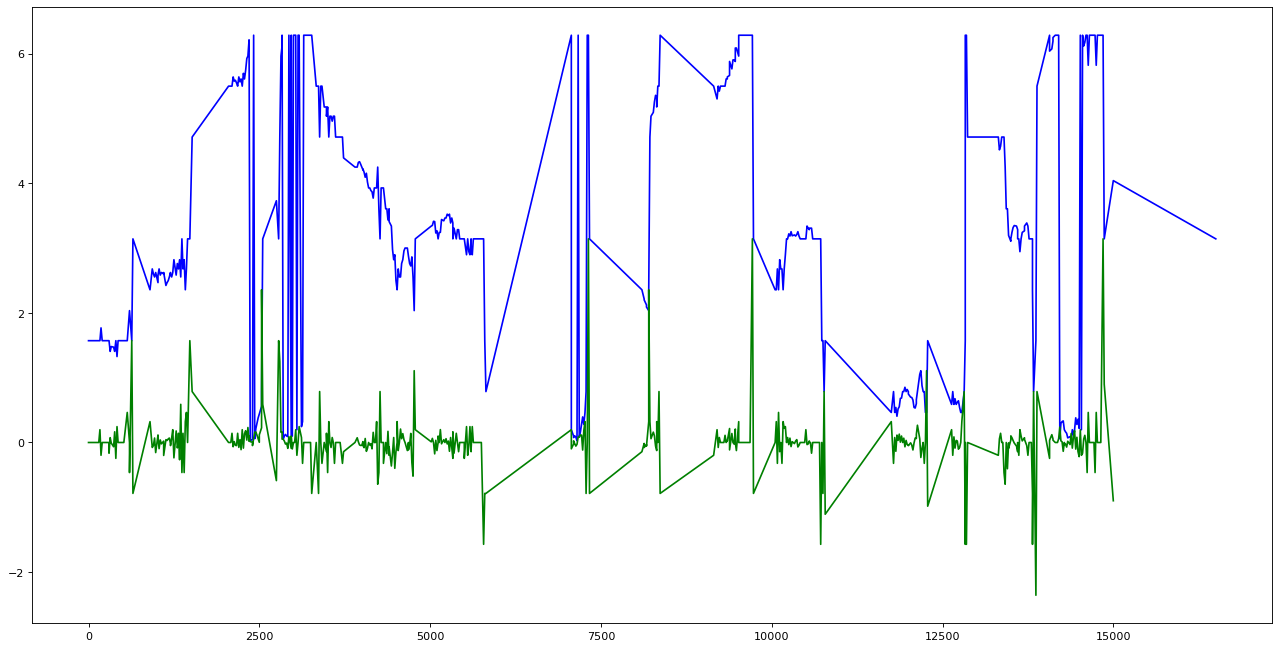

In [3]:
import os
import csv
import math
import matplotlib.pyplot as plt
import numpy

with open('coords.csv', 'r', encoding='utf-8') as coordsFile:
    with open('points.csv', 'r', encoding='utf-8') as pointsFile:
        coords = list(csv.reader(coordsFile)) # get file as 2d list
        points = list(csv.reader(pointsFile))
        coords.pop(0) # remove descriptor line
        # cast everything to ints
        for c in range(len(coords)):
            for j in range(3):
                coords[c][j] = int(coords[c][j])
        # calculate speeds
        speeds = []
        for c in range(len(coords) - 2):
            if coords[c][0] < 0:
                continue
            elif coords[c + 1][0] < 0:
                dist = math.sqrt(math.pow(coords[c][0] - coords[c + 2][0], 2) + math.pow(coords[c][1] - coords[c + 2][1], 2))
                time = coords[c + 2][2] - coords[c][2]
            else:
                dist = math.sqrt(math.pow(coords[c][0] - coords[c + 1][0], 2) + math.pow(coords[c][1] - coords[c + 1][1], 2))
                time = coords[c + 1][2] - coords[c][2]
            speeds.append(dist / time) if time != 0 else speeds.append(math.inf)
            
        # create an list of just the times for plotting
        times = []
        for coord in coords:
            if coord[0] < 0:
                continue
            else:
                times.append(coord[2])

        # calculate angles between coords
        coordAngles = []
        for c in range(len(coords) - 2):
            if coords[c][0] < 0:
                continue
            elif coords[c + 1][0] < 0:
                ydiff = coords[c + 2][1] - coords[c][1]
                xdiff = coords[c + 2][0] - coords[c][0]
            else:
                ydiff = coords[c + 1][1] - coords[c][1]
                xdiff = coords[c + 1][0] - coords[c][0]
            coordAngles.append(math.pi + math.atan2(ydiff, xdiff))

        # calculate change in angles between coords
        coordAnglesChanges = []
        for c in range(len(coordAngles) - 1):
            change = coordAngles[c + 1] - coordAngles[c]
            if abs(change) < abs(change + 2 * math.pi) and abs(change) < abs(change - 2 * math.pi):
                coordAnglesChanges.append(change)
            elif abs(change + 2 * math.pi) < abs(change - 2 * math.pi):
                coordAnglesChanges.append(change + 2 * math.pi)
            else:
                coordAnglesChanges.append(change - 2 * math.pi)
            
        # submovements
        submovements = []
        # anywhere where coordAnglesChanges > pi/6 is a submovement change
        #for c in range(len(coordsAnglesChanges)):
        #    if coordsAnglesChanges[c] 
        
        # plot things
        plt.figure(figsize=(20, 10), dpi=80)
        x = times
        x.pop()
        y = coordAngles
        plt.plot(x, y, 'b-')
        x = times
        x.pop()
        y = coordAnglesChanges
        plt.plot(x, y, 'g-')
        plt.show()